# **Group: MI4**

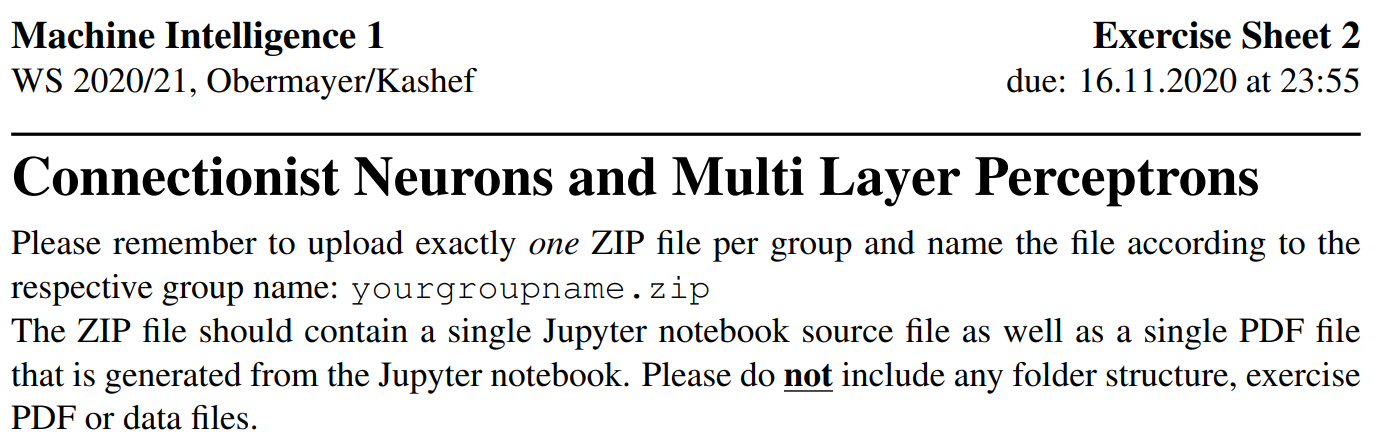

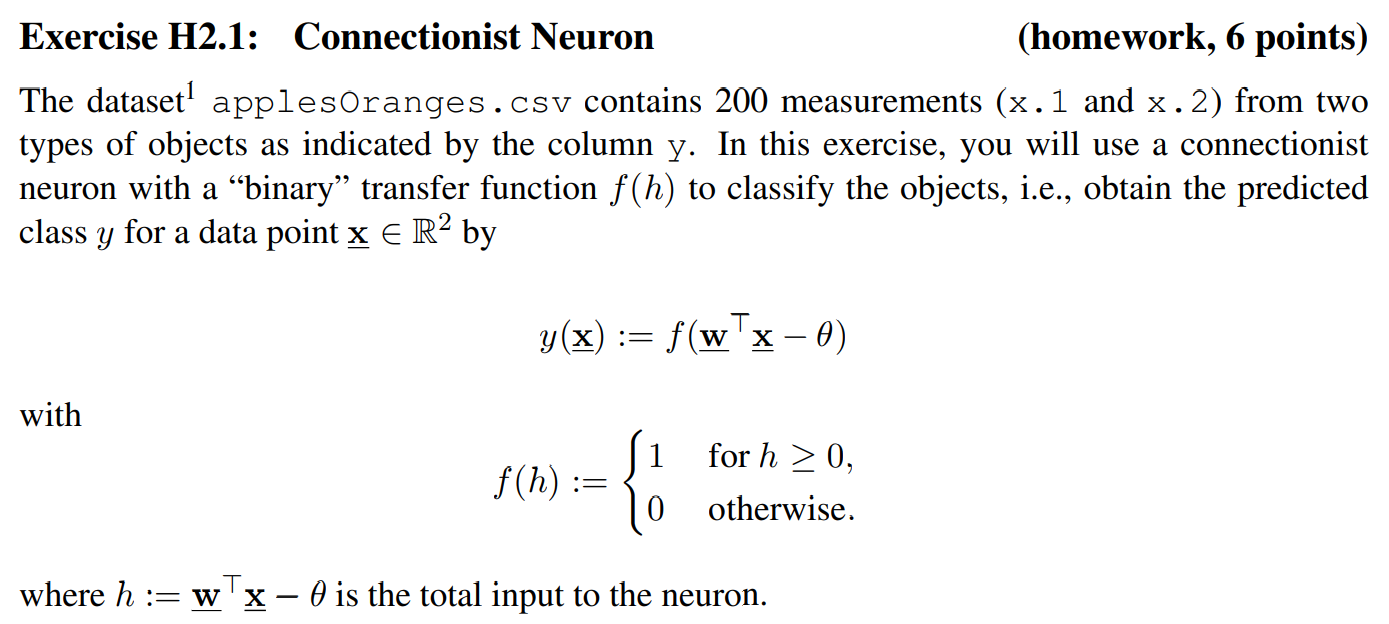

In [ ]:
import numpy as np  
import math 
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
PATH_TO_DATA = '/content/drive/My Drive/BCCN/Courses/Machine Intelligence/Machine Intelligence I/Exercise Sheets/sheet02/applesOranges (1).csv'

**(a) Plot the data in a scatter plot (x2 vs. x1). Mark the points with different colors to indicate
the type of each object.**

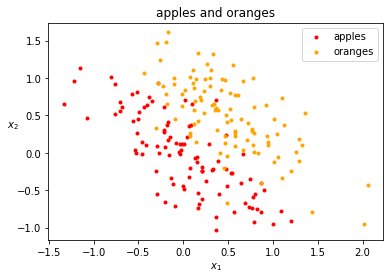

In [ ]:
raw_data = np.genfromtxt(fname=PATH_TO_DATA, delimiter=',', dtype=np.float, skip_header=1)
x = raw_data[:,:2]
y = raw_data[:,-1]
plt.scatter(x[y==0,0], x[y==0,1], marker='.', c='r', label='apples')
plt.scatter(x[y==1,0], x[y==1,1], marker='.', c='orange', label='oranges')
lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges")
plt.show()


**(b) Set the bias θ = 0. Create a set of 19 weight vectors w = (w1, w2) pointing from the origin to the upper semi-circle with radius 1 (i.e. if γ denotes the angle between the weight vector and the x-axis, for each γ = 0, 10, . . . , 180 (equally spaced) such that ||w||2 = 1, w1 ∈ [−1, 1], w2 ∈ [0, 1]). For each of these weight vectors w,**

**(i) determine % correct classifications ρ of the corresponding neuron and**

**(ii) plot a curve showing ρ as a function of γ.**

In [ ]:
theta = 0

gamma = np.arange(0, (190*math.pi)/180, (10*math.pi)/180)
w = np.zeros((19,2))
w1 = np.round(np.cos(gamma), 4)
w2 = np.round(np.sin(gamma), 4)
w[:,0] = w1
w[:,1] = w2

print(w)

[[ 1.      0.    ]
 [ 0.9848  0.1736]
 [ 0.9397  0.342 ]
 [ 0.866   0.5   ]
 [ 0.766   0.6428]
 [ 0.6428  0.766 ]
 [ 0.5     0.866 ]
 [ 0.342   0.9397]
 [ 0.1736  0.9848]
 [ 0.      1.    ]
 [-0.1736  0.9848]
 [-0.342   0.9397]
 [-0.5     0.866 ]
 [-0.6428  0.766 ]
 [-0.766   0.6428]
 [-0.866   0.5   ]
 [-0.9397  0.342 ]
 [-0.9848  0.1736]
 [-1.      0.    ]]


[67.5 70.5 76.  74.5 71.  73.5 75.5 75.  72.5 69.  63.  60.  56.5 52.
 50.5 46.5 42.  35.  32.5]


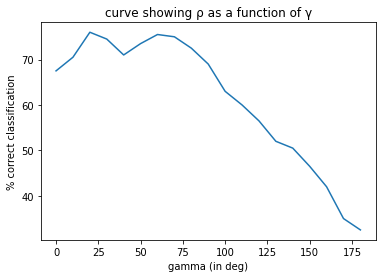

In [ ]:
h = np.dot(w,x.T) - theta

#activation function
f = np.where(h > 0, 1, 0)

percentage_correct_classification = (np.sum(f==y, axis=1)/(200))*100
print(percentage_correct_classification)

plt.plot(gamma*180/math.pi, percentage_correct_classification.T) 
plt.xlabel('gamma (in deg)')
plt.ylabel('% correct classification')
plt.title("curve showing ρ as a function of γ")
plt.show()

**(c) Out of the 19 weight vectors from above, pick the w that yields the best performance. Now,
vary the bias θ ∈ [−3, 3] and pick the value of θ that gives the best performance.**

In [ ]:
index_p_max = np.argmax(percentage_correct_classification)
w_best = w[index_p_max,:]

p_max = -1
for theta_ in range(-3, 4, 1):
  h_temp = np.dot(w_best,x.T) - theta_
  f_temp = np.where(h_temp > 0, 1, 0)
  p_temp = np.sum(f_temp == y)
  if p_temp > p_max:
    p_max = p_temp
    theta_best = theta_
    f_best = f_temp

print(theta_best)

0


**(d) Plot the data points and color them according to the predicted classification when using the
w and θ that led to the highest performance. Plot the weight vector w in the same plot. How
do you interpret your results?**

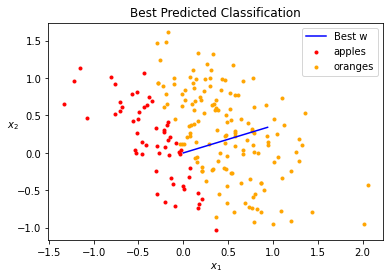

In [ ]:
plt.scatter(x[f_best==0,0], x[f_best==0,1], marker='.', c='r', label='apples')
plt.scatter(x[f_best==1,0], x[f_best==1,1], marker='.', c='orange', label='oranges')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("Best Predicted Classification")
plt.plot([0, w_best[0]] , [0, w_best[1]] , c='blue', label='Best w')
lgd = plt.legend()
plt.show()

The weight vector defines the optimal decision boundary (at least in the grid space defined) that maximises the classification accuracy of apples/oranges.

**(e) Find the best combination of w and θ by exploring all combinations of γ and θ (within a reasonable range and precision). Compute and plot the performance of all combinations in a heatmap.**


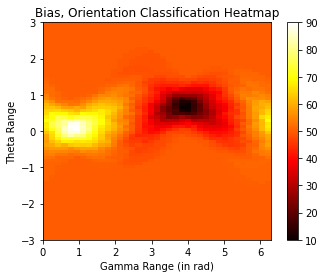

The best combination of gamma and theta are 0.6981317007977318 and 0.30000000000000293 respectively.
0.766
The best weight is w1: 0.766, w2:0.6428 with a correct classification of 90.0 percent.


In [86]:
theta_array = np.arange(-3, 4, 0.1)
gamma_array = np.arange(0, (370*math.pi)/180, (10*math.pi)/180)

percentage_correct_classification_best = -1

match_mat = np.empty([len(theta_array), len(gamma_array)])

 
for i in range(len(theta_array)):

    for j in range(len(gamma_array)):

        w1 = np.round(np.cos(gamma_array[j]), 4)
        w2 = np.round(np.sin(gamma_array[j]), 4)
        weight = np.zeros((1,2))
        weight[:,0] = w1
        weight[:,1] = w2

        h = np.dot(weight,x.T) - theta_array[i]
        f = np.where(h > 0, 1, 0)

        percentage_correct_classification = (np.sum(f==y, axis=1)/(200))*100

        match_mat[i][j] = percentage_correct_classification
        

        if percentage_correct_classification>percentage_correct_classification_best:
            percentage_correct_classification_best = percentage_correct_classification
            gamma_best = gamma_array[j]
            theta_best = theta_array[i]
    
plt.imshow(match_mat, cmap='hot', interpolation='nearest', extent = [0, 6.28, -3, 3])
plt.colorbar()
plt.xlabel('Gamma Range (in rad)')
plt.ylabel('Theta Range')
plt.title("Bias, Orientation Classification Heatmap")
plt.show()
print("The best combination of gamma and theta are %s and %s respectively." % (gamma_best, theta_best))
print(np.round(np.cos(gamma_best), 4))
print("The best weight is w1: %s, w2:%s with a correct classification of %s percent." % (np.round(np.cos(gamma_best), 4), np.round(np.sin(gamma_best), 4), percentage_correct_classification_best[0]))

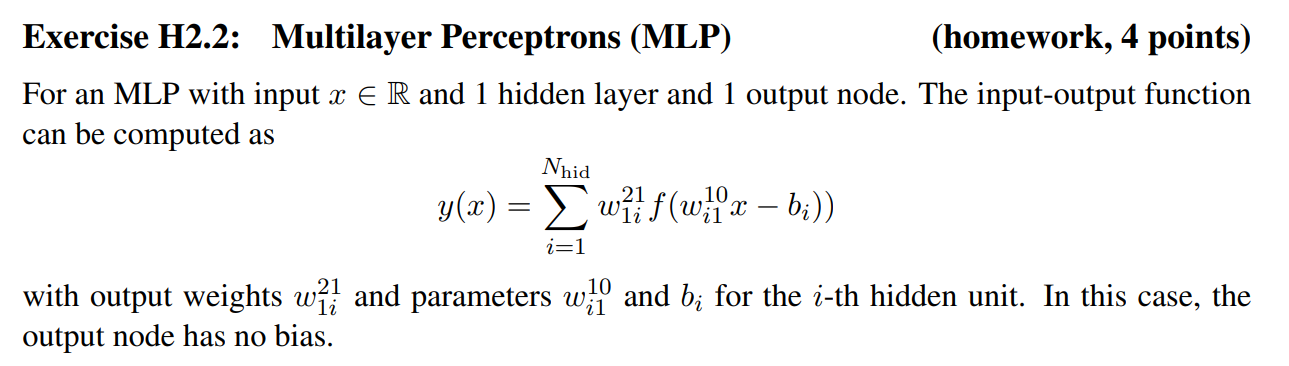

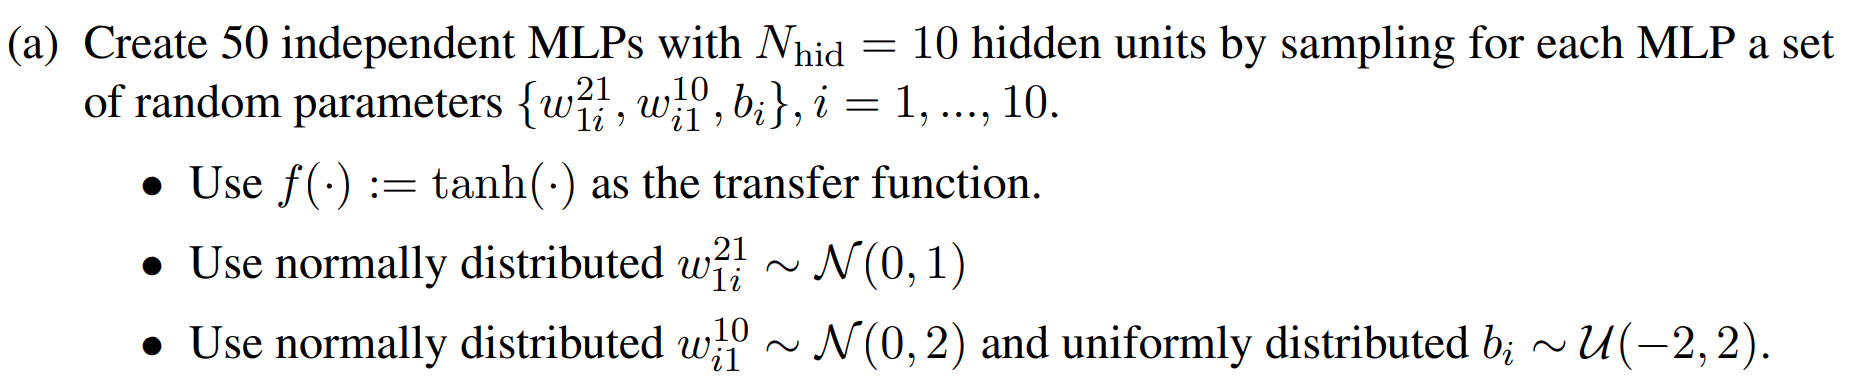

In [ ]:
def random_weight_initializer(m1, m2 , s1, s2, num, N_hid=10):

    #num : number of independent MLPs
    # m1 : mean 1
    # m2 : mean 2
    # s1 : s.d 1
    # s2 : s.d 2

    w10  = np.random.normal(m1 , s1 , (N_hid, num))     
    w21  = np.random.normal(m2 , s2 , (N_hid, num))    
    b   =  np.random.uniform(-2, 2 , (N_hid, num)) 

    return w10, w21, b

def MLP(x, w10, w21, b):

    y = np.diag(np.matmul(w21.T , np.tanh(w10*x - b))  )
    return y 


#test
w10 ,  w21 , b = random_weight_initializer(0,0,2,1, 50)     
MLP_ = [MLP(x, w10, w21, b) for x in np.random.randint(-2,2,1)]
MLP_                                                   


[array([ 0.85052722,  2.12286348, -2.05343418,  0.44298145, -4.30034271,
        -0.01106092,  1.68153694, -1.2280478 , -0.32625692,  1.68217435,
        -3.83349852,  0.78835377, -0.59292338,  2.03789786, -5.06746315,
        -3.97072335, -2.9379153 , -2.03443286,  0.08076328, -0.01056753,
        -1.79420396,  2.29550856, -1.69563985, -0.06470114,  4.62183284,
        -0.81793529,  1.26330974, -0.01733686, -0.59931302,  0.1720737 ,
        -3.10596353, -1.0619503 ,  1.80300426, -4.51539172,  0.15563199,
         1.78963338,  3.97862954,  0.81315732, -3.4434027 ,  2.52241046,
        -4.87489973,  2.29547619, -1.18013282,  0.28474837, -3.29063026,
        -0.49797493,  3.39983255, -2.95291341, -0.99519493, -5.05552752])]

**(b) Plot the input-output functions (i.e. the response y(x)) of these 50 MLPs for x ∈ [−2, 2].**

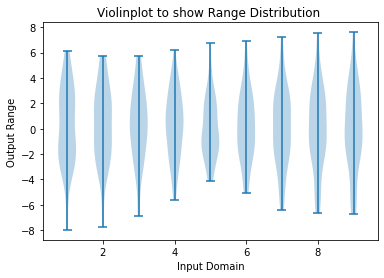

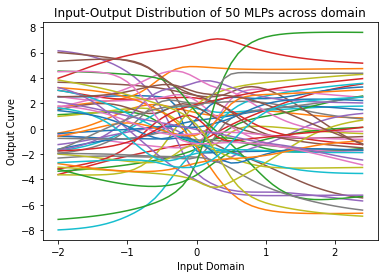

In [ ]:
w10 ,  w21 , b = random_weight_initializer(0,0,2,1, 50)

def generate_response(x, w10, w21, b):
  response_array = np.empty([len(x),50])
  for i in range(len(x)) : 
      response_array[i] = MLP(x[i], w10, w21, b)
  return response_array

def violin_plot(input_array):
  plt.violinplot(input_array.T)
  plt.xlabel('Input Domain')
  plt.ylabel('Output Range')
  plt.title('Violinplot to show Range Distribution ')
  plt.show()

def input_output_distribution(x, input_array):
  for i in range(50):
      plt.plot(x, input_array[:,i])
  plt.xlabel('Input Domain')
  plt.ylabel('Output Curve')
  plt.title('Input-Output Distribution of 50 MLPs across domain')
  plt.show()

x = np.arange(-2,2.5,0.5)
violin_plot(generate_response(x, w10, w21, b))

x = np.arange(-2,2.5,0.1)
input_output_distribution(x, generate_response(x, w10, w21, b))

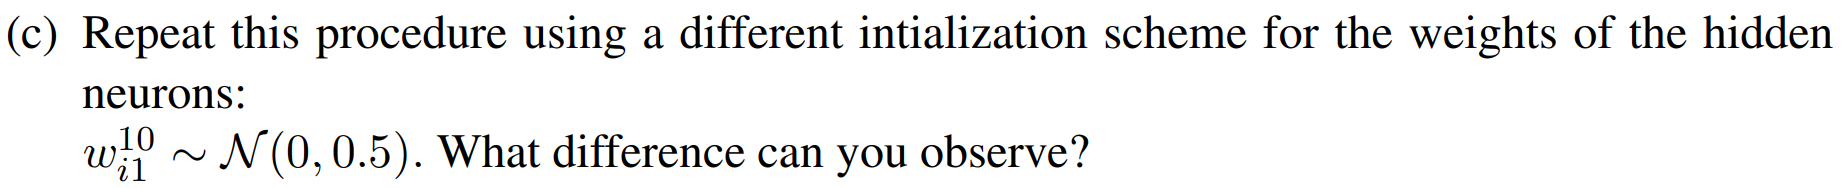

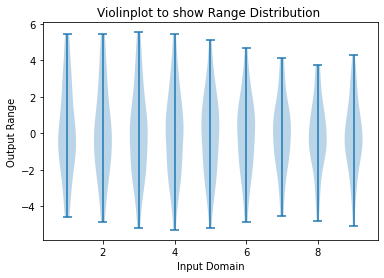

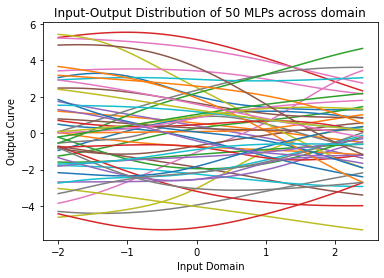

In [ ]:
w10_, w21_, b_ = random_weight_initializer(0,0,0.5,1, 50) 

response_array = np.empty([len(x),50])
for i in range(len(x)) : 
    response_array[i] = MLP(x[i], w10_,  w21_, b_ )

x = np.arange(-2,2.5,0.5)
violin_plot(generate_response(x, w10_, w21_, b_))

x = np.arange(-2,2.5,0.1)
input_output_distribution(x, generate_response(x, w10_, w21_, b_))

With a lower standard deviation on our weight distribution, we get more weights centered around 0. As a result, in the limit of small input values x, the linear combination of across hidden nodes with W_10 is also small. And in the small limit, hyperbolic tangent behaves linearly and therefore, we see that the distribution of MLPs is more uniformly distributed. In other words, the MLPs do a poorer job at being universal function approximators across the input domain, something we expect of MLPs with linear activation functions.  (Higher the standard deviation on the weight initialisation, denser do we cover the possible functions on a specified domain.)

**(d) Compute the mean squared error (MSE) between each of these 2 × 50 (50 from each of the
above two initialization procedures) input-output functions and the function g(x) = −x.
For each of the two initialization procedures, which MLP approximates g best? Plot y(x)
for these two MLPs.**

The best function approximator of g(x) with initialisation in part b is MLP( 44 ) and the mean square error is: [0.0076547]
The best function approximator of g(x) with initialisation in part c is MLP( 30 )and the mean square error is: [0.18400767]


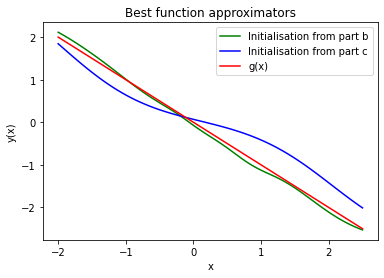

In [ ]:
x=np.linspace(-2,2.5,100)

g=-x

MLP_ = np.empty([len(x),50])
MLP_new= np.empty([len(x),50])
mse_1=np.empty([50,1])
mse_2=np.empty([50,1])
for i in range(len(x)) : 
    MLP_[i,:]= MLP(x[i], w10, w21, b)
    MLP_new[i,:]=MLP(x[i], w10_, w21_, b_)
    
for i in range(50):    
    difference_array_1= np.subtract(g, MLP_[:,i])
    squared_array_1 = np.square(difference_array_1)
    mse_1[i] = squared_array_1.mean()
    difference_array_2 = np.subtract(g, MLP_new[:,i])
    squared_array_2 = np.square(difference_array_2)
    mse_2[i] = squared_array_2.mean()

print("The best function approximator of g(x) with initialisation in part b is MLP(",np.argmin(mse_1),") and the mean square error is:",min(mse_1))
print("The best function approximator of g(x) with initialisation in part c is MLP(",np.argmin(mse_2),")and the mean square error is:",min(mse_2))

plt.plot(x,MLP_[:,np.argmin(mse_1)],c='g', label='Initialisation from part b')
plt.plot(x,MLP_new[:,np.argmin(mse_2)],c='b', label='Initialisation from part c')
plt.plot(x,g,c='r', label='g(x)')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Best function approximators")
lgd = plt.legend()
plt.show()
